In [4]:
import numpy as np
import pyfastchem 

import pyfastchem
import numpy as np
import os
import matplotlib.pyplot as plt
from astropy import constants as const


#Do the chemistry calculations
#this loads the temperatures and pressures produced by petitRADTRANS, you may need to modify these lines if you store these data products somewhere else
temperatures = np.load('data_products/radtrans_temperature.npy')
pressures = np.load('data_products/radtrans_pressure.npy')

In [5]:
fastchem = pyfastchem.FastChem('/home/calder/Documents/FastChem/input/element_abundances/asplund_2020_extended.dat', 
                               '/home/calder/Documents/FastChem/input/logK/logK.dat', 
                               1)


FastChem initialisation summary:
  number of species: 575    elements: 80    molecules: 495    condensates: 0



In [6]:
input_data = pyfastchem.FastChemInput()
output_data = pyfastchem.FastChemOutput()

In [7]:
input_data.temperature = temperatures
input_data.pressure = pressures

In [8]:
fastchem_flag = fastchem.calcDensities(input_data, output_data)
print("FastChem reports:", pyfastchem.FASTCHEM_MSG[fastchem_flag])

FastChem reports: convergence ok


In [9]:
number_densities = np.array(output_data.number_densities)
gas_number_density = pressures*1e6 / (const.k_B.cgs * temperatures)

In [10]:
number_densities

array([[4.28550853e+07, 6.86026457e-02, 3.69056590e+04, ...,
        1.95432449e-17, 5.58015721e+02, 2.86384766e-14],
       [4.84049050e+07, 9.78044933e-02, 4.65826727e+04, ...,
        3.14704330e-17, 7.04225185e+02, 4.61099736e-14],
       [5.46914644e+07, 1.39478831e-01, 5.87953306e+04, ...,
        5.07088513e-17, 8.88701377e+02, 7.42859851e-14],
       ...,
       [1.84090386e+11, 5.01392320e+13, 9.76747962e+14, ...,
        8.61888279e+03, 1.92518021e-02, 1.64947145e+04],
       [2.04607654e+11, 5.36449172e+13, 1.23222241e+15, ...,
        1.12634033e+04, 2.22738442e-02, 2.31099119e+04],
       [2.27304678e+11, 5.74075335e+13, 1.55439476e+15, ...,
        1.46857330e+04, 2.59086572e-02, 3.23536913e+04]])

In [11]:
#change the below lines to select which species you want to calculate the volume mixing ratios for
# abundance_species_labels = ['CO', 'H2O', 'VO', 'OH', 'CO2', 'CH4', 'C2H2', 'NH3', 'HCN', 'Fe', 'Fe+', 'Cr', 'Si']
# abundance_species = ['C1O1', 'H2O1', 'O1V1', 'H1O1', 'C1O2', 'C1H4', 'C2H2', 'H3N1', 'C1H1N1_1', 'Fe', 'Fe1+', 'Cr', 'Si']

In [69]:
abundance_species = ['Ru']
abundance_species_labels = ['Ru']


In [70]:
#set the quench pressure to 1 bar
quench = np.argmin(np.abs(pressures-1e1))

In [71]:
a_index = []
abundance_species_indices, abundance_species_masses_ordered = [], []
n_species = fastchem.getElementNumber()

In [72]:
for i, species in enumerate(abundance_species):
        index = fastchem.getGasSpeciesIndex(species)
if index != pyfastchem.FASTCHEM_UNKNOWN_SPECIES:
    abundance_species_indices.append(index) 
    #abundance_species_masses_ordered.append(fastchem.getSpeciesMolecularWeight(index))
    this_species = number_densities[quench, index]/gas_number_density[quench]
    print("The VMR for ",species,' is ', this_species)
else:
    print("Species", species, "to plot not found in FastChem")

The VMR for  Ru  is  9.651513328234593e-11 erg / K


In [45]:
help(fastchem.getGasSpeciesIndex)

Help on method getGasSpeciesIndex in module pyfastchem:

getGasSpeciesIndex(...) method of pyfastchem.FastChem instance
    getGasSpeciesIndex(self: pyfastchem.FastChem, arg0: str) -> int



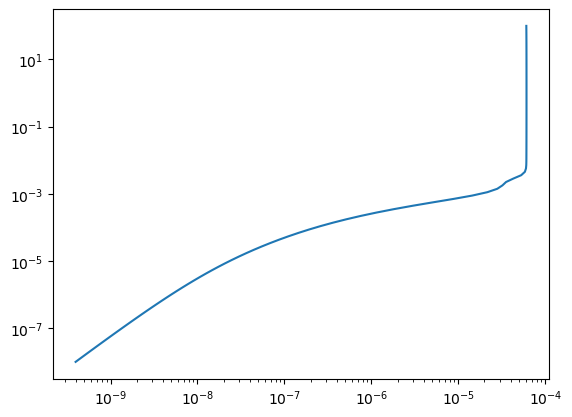

In [17]:
plot_species = ['Fe', 'Fe+', 'Na', 'Ni', 'Ca', 'Co', 'V I']
#for the plot labels, we therefore use separate strings in the usual notation
plot_species_labels = ['Fe I', 'Fe II', 'Na I', 'Ni I', 'Ca I', 'Co I', 'V I']
plot_species_cond = ['Fe(s,l)', 'Fe+(s,l)', 'Na(s,l)', 'Ni(s,l)', 'Ca(s,l)', 'Co(s,l)']


plt.plot(number_densities[:, index]/gas_number_density[:],pressures)
plt.xscale('log')
plt.yscale('log')